In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import subprocess

import sys
from copy import copy
import scipy
import imageio
sys.path.append("../")
import itertools
from scipy.stats import norm
import matplotlib.mlab as mlab
from mvgavg import mvgavg
from alienlab import utils
import alienlab
from alienlab import regression_func
import pickle as pk
from alienlab import plot
from activation_experiment import activation_experiment

from useful_func import dtw, get_path, plot_warped_timeseries
from useful_func import spectrum_a, spectrum_d
from useful_func import residuals, exp_decay, get_fit, sigmoid, exp_decay_max
from useful_func import gradient_magnitude, gradient_orientation, gaussian_kernel, assign_orientation, crop_center, cconv, get_algae_im
from numpy import genfromtxt

from joblib import Parallel, delayed
from useful_func import make_svm, make_pca

import skued
import sklearn
import sklearn.discriminant_analysis
import pandas as pd


import skimage

from useful_func import fit_biexp, fit_exp, fit_monoexp

import tifffile as tiff
import random
%matplotlib inline

g = plot.PlotFigure()
g.fontsize=17

C:\Users\Alienor\anaconda3\envs\tf-gpu\lib\site-packages\statsmodels-0.13.1-py3.9-win-amd64.egg\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:

exp_set = []
exp_description = []
exp_position = []
exp_strain = []
photoinhibition_status = []
qE_status = []
qT_status = []

#0:stt71
#1:wt4
#2:npq4
#3:cc124
#4:WT222

if True:

    folder = "../FOLDER_2022_03_10_activation_4H_ENS_stt7"
    exp_description.append("stt7")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(0)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(0)

if True:

    folder = "../FOLDER_2022_03_10_activation_4H_ENS_stt7"
    exp_description.append("stt7 qI")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(0)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(0)
    
if True:

    folder = "../FOLDER_2022_03_10_activation_4H_ENS_stt7"
    exp_description.append("stt7 qI qE")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(0)
    photoinhibition_status.append(1)
    qE_status.append(1)
    qT_status.append(0)

#################################    

if True:

    folder = "../FOLDER_2022_03_08_activation_4H_ENS_wt4"
    exp_description.append("wt4 qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(1)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(1)

if True: 
    folder = "../FOLDER_2022_03_08_activation_4H_ENS_wt4"
    exp_description.append("wt4 qI qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)

if True:
    folder = "../FOLDER_2022_03_08_activation_4H_ENS_wt4"
    exp_description.append("wt4 qI qE qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(1)
    qT_status.append(1)



##################################

if False:
    folder = "../FOLDER_2022_03_09_activation_4H_ENS_npq4"
    exp_description.append("npq4 qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(2)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(1)

if False:
    folder = "../FOLDER_2022_03_09_activation_4H_ENS_npq4"
    exp_description.append("npq4 qI qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(2)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)

if False:
    folder = "../FOLDER_2022_03_09_activation_4H_ENS_npq4"
    exp_description.append("npq4 qI qE qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(2)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)
    
    
#######################
if False:
    folder = "../FOLDER_2022_03_16_WT222_SC1"
    exp_description.append("wt222 qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(1)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(1)

if False: 
    folder = "../FOLDER_2022_03_16_WT222_SC1"
    exp_description.append("wt222 qI qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)

if False:
    folder = "../FOLDER_2022_03_16_WT222_SC1"
    exp_description.append("wt222 qI qE qT")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(1)
    qT_status.append(1)




#########################
"""

folder = "../FOLDER_2022_03_22_CC_124_activated_IBPC_sync"
exp_description.append("CC_124 activated IBPC")
exp_set.append(activation_experiment(folder))
exp_position.append(1)


folder = "../FOLDER_2022_03_23_npq4_activated_IBPC_sync"
exp_description.append("npq4 IBPC")
exp_set.append(activation_experiment(folder))
exp_position.append(1)


folder = "../FOLDER_2022_03_24_stt71_activated_IBPC_sync"
exp_description.append("stt71 IBPC")
exp_set.append(activation_experiment(folder))
exp_position.append(1)



folder = "../FOLDER_2022_03_25_wt4_activated_IBPC_sync"
exp_description.append("wt4 IBPC")
exp_set.append(activation_experiment(folder))
exp_position.append(1)


folder = "../FOLDER_2022_03_31_STT71_polyculture_slow_activateion_45min"
exp_description.append("stt7-45min ENS")
exp_set.append(activation_experiment(folder))
exp_position.append(0)


folder = "../FOLDER_2022_02_22_HL_chunks_WT4_backup"
exp_description.append("wt4-2H ENS not activated")
exp_set.append(activation_experiment(folder))
exp_position.append(0)


folder = "../FOLDER_2022_02_22_HL_chunks_WT4_backup"
exp_description.append("wt4-2H ENS activated")
exp_set.append(activation_experiment(folder))
exp_position.append(1)

folder = "../FOLDER_2022_04_05_WT4_monoclonal_synchro_ENS_4H"
exp_description.append("wt4-4H-monoclonal_synchro")
exp_set.append(activation_experiment(folder))

folder = "../FOLDER_2022_04_06_stt71_scl1_monoclonal_synchro_ENS_4H"
exp_description.append("stt7-4H-monoclonal_synchro")
exp_set.append(activation_experiment(folder))


folder = "../FOLDER_2022_04_07_stt71_scl3_monoclonal_synchro_ENS_4H"
exp_description.append("stt7-scl3-4H-monoclonal_synchro")
exp_set.append(activation_experiment(folder))




folder = "../FOLDER_2022_03_29_4H_ENS_CC_124_sync"
exp_description.append("CC_124_ENS_test1")
exp_set.append(activation_experiment(folder))




folder = "../FOLDER_2022_03_30_4H_ENS_CC_124_sync"
exp_description.append("CC_124_ENS_test2")
exp_set.append(activation_experiment(folder))

"""

'\n\nfolder = "../FOLDER_2022_03_22_CC_124_activated_IBPC_sync"\nexp_description.append("CC_124 activated IBPC")\nexp_set.append(activation_experiment(folder))\nexp_position.append(1)\n\n\nfolder = "../FOLDER_2022_03_23_npq4_activated_IBPC_sync"\nexp_description.append("npq4 IBPC")\nexp_set.append(activation_experiment(folder))\nexp_position.append(1)\n\n\nfolder = "../FOLDER_2022_03_24_stt71_activated_IBPC_sync"\nexp_description.append("stt71 IBPC")\nexp_set.append(activation_experiment(folder))\nexp_position.append(1)\n\n\n\nfolder = "../FOLDER_2022_03_25_wt4_activated_IBPC_sync"\nexp_description.append("wt4 IBPC")\nexp_set.append(activation_experiment(folder))\nexp_position.append(1)\n\n\nfolder = "../FOLDER_2022_03_31_STT71_polyculture_slow_activateion_45min"\nexp_description.append("stt7-45min ENS")\nexp_set.append(activation_experiment(folder))\nexp_position.append(0)\n\n\nfolder = "../FOLDER_2022_02_22_HL_chunks_WT4_backup"\nexp_description.append("wt4-2H ENS not activated")\nex

In [3]:
if True:
    liste_pair = list(itertools.combinations(np.linspace(250, 2050, 91).astype(int), 2))
    list_of_couples = list(zip(*liste_pair))
    
    trace_set = []
    class_set = []
    strain_set  = []
    description_set = []
    couple_set = []
    

    for j, elem in enumerate(exp_set):
        if exp_position[j] == 0:
            traces, labels = elem.get_traces(elem.measure[0][-2:])

        if exp_position[j] == 2:
            traces, labels = elem.get_traces(elem.measure[0][0:1])

        if exp_position[j] == 1:
            traces, labels = elem.get_traces(elem.measure[1][-2:])

        v0 = np.expand_dims(traces[:,250], 1)
        traces_0 = (v0 - traces[:,list_of_couples[0]])/traces[:,list_of_couples[0]]
        traces_1 = (v0 - traces[:,list_of_couples[1]])/traces[:,list_of_couples[1]]
        traces = traces_1 - traces_0
        trace_set.append(traces)
        class_set.append([j]*len(traces))
        strain_set.append([exp_strain[j]]*len(traces))
        description_set.append([exp_description[j]]*len(traces))
        diff  = np.array(len(list_of_couples[0])*["-"])
        A = np.array(list_of_couples[1]).astype(str)
        B = np.array(list_of_couples[0]).astype(str)   
        A = np.char.add(A, diff)
        couple_set=np.char.add(A, B)
   

In [4]:
all_data = np.concatenate(trace_set, axis = 0)

In [5]:
#from https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python#mcetoc_1g0c4fnd49


all_descriptions = np.concatenate(description_set)
#all_descriptions = np.expand_dims(all_description)
#data = np.concatenate([all_data, all_strains, all_classes], axis = 1)

all_classes = np.concatenate(class_set)
#all_classes = np.expand_dims(all_classes, 1)


drops = []
for description in np.unique(all_descriptions):
    cor_matrix = np.abs(np.corrcoef(all_data[all_descriptions==description].T))
    
    #plt.matshow(cor_matrix)
    upper_tri = np.triu(np.ones(cor_matrix.shape),k=1).astype(np.float64)

    cor_tri = cor_matrix*upper_tri
    #plt.matshow(cor_tri)
    maxi_col = np.max(cor_tri, axis = 0)
    local_drop = maxi_col > 0.800
    drops.append(local_drop)
    print(description, np.sum(local_drop))

drops = np.array(drops)
drops.shape
positions_to_keep = np.sum(drops, axis = 0)<np.max(all_classes)
print("kept couples:", np.sum(positions_to_keep), ",", np.sum(positions_to_keep)/cor_matrix.shape[0]*100, "%")

stt7 3858
stt7 qI 3808
stt7 qI qE 3905
wt4 qI qE qT 3839
wt4 qI qT 3613
wt4 qT 3886
kept couples: 367 , 8.962148962148962 %


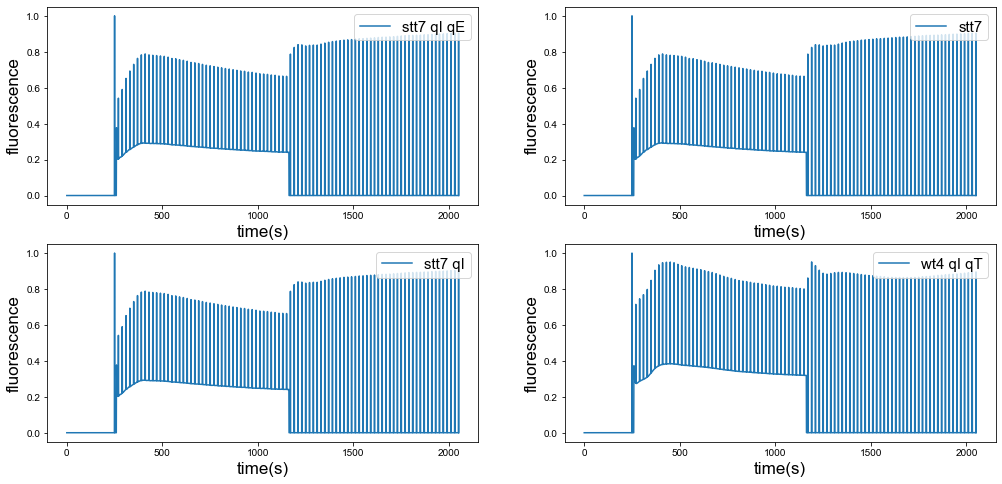

In [6]:
fig, axs = plt.subplots(2,2,figsize=(17,8))
axs = axs.flatten()
for j, i in enumerate([2, 0, 1, 4]):
    elem = exp_set[i]
    m = elem.means(elem.measure[1])[0]
    axs[j].plot(m/m[250], label = exp_description[i])
    axs[j].set_xlabel("time(s)", fontsize=g.fontsize)
    axs[j].set_ylabel("fluorescence", fontsize=g.fontsize)
    axs[j].legend(prop={"size":15}, loc=1)
    
plt.savefig("4_types_mean_traces.pdf")

In [30]:
def make_lda(n_components, train_data, Y_train_label):
    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

    lda.fit(train_data,Y_train_label)
    X = lda.transform(train_data)
    print(X.shape)
    print("LDA components:")
    #lt.matshow(lda.scalings_)
    plt.figure()
    print("LDA explained variance:")
    plt.semilogy(lda.explained_variance_ratio_)
    plt.ylabel("eignevalue")
    plt.xlabel("component")

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=Y_train_label)##
    #plt.plot(boundary[:,0], boundary[:,1], c = 'k')
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    return lda


In [31]:
for i, exp in enumerate(exp_description):
    print(i, exp)

0 stt7
1 stt7 qI
2 stt7 qI qE
3 wt4 qT
4 wt4 qI qT
5 wt4 qI qE qT


In [32]:
selected_classes = [0, 1, 2, 3, 4, 5]
ref = all_classes*0 -1
for ind in selected_classes:
    ref += all_classes==ind
    

database = all_data[:,positions_to_keep]

all_couples = couple_set


index = all_couples[positions_to_keep]

all_classes = np.concatenate(class_set)
#all_classes = np.expand_dims(all_classes, 1)

all_strains = np.concatenate(strain_set)
#all_strains = np.expand_dims(all_strains, 1)

all_descriptions = np.concatenate(description_set)
#all_descriptions = np.expand_dims(all_description)
#data = np.concatenate([all_data, all_strains, all_classes], axis = 1)

all_classes = np.expand_dims(all_classes, 0)
all_strains = np.expand_dims(all_strains, 0)
all_descriptions = np.expand_dims(all_descriptions, 0)
database2 = np.concatenate([database.T, all_strains, all_classes], axis = 0)
data = database2[:,ref==0]

train size : (799, 369)
validation size : (89, 369)
test size : (99, 369)
(799, 5)
LDA components:
LDA explained variance:
Best score for training data: 0.9211635220125786 

Best C: 10 

Best Kernel: rbf 

Best Gamma: 0.001 

training accuracy: 0.9949937421777222
validation accuracy: 0.9662921348314607


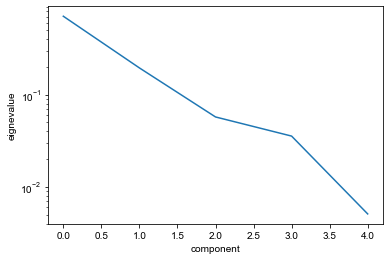

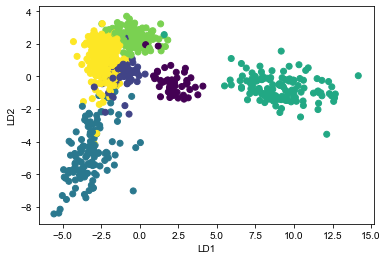

In [33]:
train, test = sklearn.model_selection.train_test_split(data.T, test_size = 0.1)#, random_state = 1) #always generate the same test set
train, validation = sklearn.model_selection.train_test_split(train, test_size = 0.1)
print("train size :", train.shape)
print("validation size :", validation.shape)
print("test size :", test.shape)


train_set = train[:,:-2]
validation_set = validation[:,:-2]
train_classes =  train[:,-1]
validation_classes= validation[:,-1] 
labels = train[:,-2]
lda = make_lda(train.shape[1]-3, train_set, train_classes)
pk.dump(lda, open("pca.pkl","wb"))
X = lda.transform(train_set)
x = X[:,0]
y = X[:,1]


M_svm = np.mean(train_set, axis = 0)
S_svm = np.std(train_set, axis = 0)
train_svm = (train_set - M_svm)/S_svm
validation_svm = (validation_set - M_svm)/S_svm
final_model = make_svm(train_svm, train_classes)


pred = final_model.predict(validation_svm)
print("validation accuracy:", np.mean(pred==validation_classes))
plt.show()